##                                                  ML_ASSIGNMENT_07
###                                                             ALAN THOMAS 21BDA08

### 1.  Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

## Grid Search CV
Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters. It tries all combinations of parameters grid for a model and returns with the best set of parameters having the best performance score.

reference : https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [86]:
from sklearn import datasets
iris = datasets.load_iris()

### i) Logistic Regression

In [88]:
from sklearn.datasets import load_iris
iris=load_iris()

x=iris.data
y=iris.target

x=x[:100,:]#first 100
y=y[:100]# first 100
# normalization
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [90]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\alant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\alant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\alant\anaconda3\lib\site-packages\sklearn\model_selection\_v

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 1.0


C:\Users\alant\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.52857143        nan 0.52857143        nan 0.95714286
        nan 1.                nan 1.                nan 1.
        nan 1.        ]
  warnings.warn(


In [91]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 1.0


### ii) KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

weight_functions = ["uniform", "distance"]
p_values = [1, 2]
n_range = list(range(1, 51))

param_grid = {"n_neighbors": n_range,
              "weights": weight_functions,
              "p": p_values
              }         #setting grid of parameters

grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

knn_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
knn_model.fit(iris.data, iris.target)       #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9667
{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}


### 2.  What is Stride, Padding & Pooling? Explain with an example.

### Strides
When the array is created, the pixels are shifted over to the input matrix. The number of pixels turning to the input matrix is known as the strides. When the number of strides is 1, we move the filters to 1 pixel at a time. Similarly, when the number of strides is 2, we carry the filters to 2 pixels, and so on. They are essential because they control the convolution of the filter against the input, i.e., Strides are responsible for regulating the features that could be missed while flattening the image. They denote the number of steps we are moving in each convolution. The following figure shows how the convolution would work.
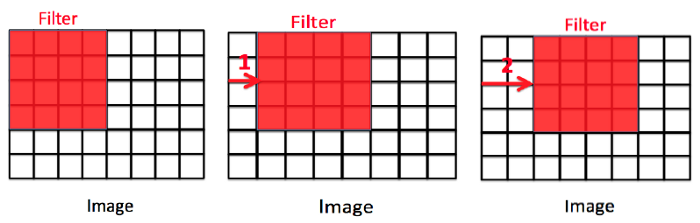
In the first matrix, the stride = 0, second image: stride=2, and the third image: stride=2. The size of the output image is calculated by:

[{(n+2p-f+1)/s}+1][{(n+2p-f+1)/s}]

### Padding
The padding plays a vital role in creating CNN. After the convolution operation, the original size of the image is shrunk. Also, in the image classification task, there are multiple convolution layers after which our original image is shrunk after every step, which we don’t want. 

Secondly, when the kernel moves over the original image, it passes through the middle layer more times than the edge layers, due to which there occurs an overlap.

To overcome this problem, a new concept was introduced named padding. It is an additional layer that can add to the borders of an image while preserving the size of the original picture. For example:
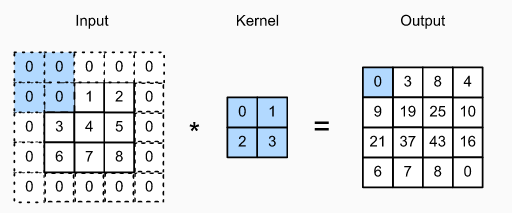
So, if an n x n matrix is convolved with an ff matrix with a padding p, then the size of the output image will be:

(n+2p-f+1) x (n+2p-f+1) 

### Pooling
The pooling layer is another building block of a CNN and plays a vital role in pre-processing an image. In the pre-process, the image size shrinks by reducing the number of parameters if the image is too large. When the picture is shrunk, the pixel density is also reduced, the downscaled image is obtained from the previous layers. Basically, its function is to progressively reduce the spatial size of the image to reduce the network complexity and computational cost. Spatial pooling is also known as downsampling or subsampling that reduces the dimensionality of each map but retains the essential features. A rectified linear activation function, or ReLU, is applied to each value in the feature map. Relu is a simple and effective nonlinearity that does not change the values in the feature map but is present because later subsequent pooling layers are added. Pooling is added after the nonlinearity is applied to the feature maps. There are three types of spatial pooling:

### i. Max Pooling
Max pooling is a rule to take the maximum of a region and help to proceed with the most crucial features from the image. It is a sample-based process that transfers continuous functions into discrete counterparts. Its primary objective is to downscale an input by reducing its dimensionality and making assumptions about features contained in the sub-region that were rejected.
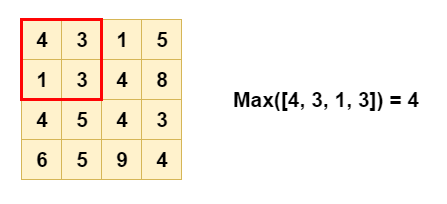
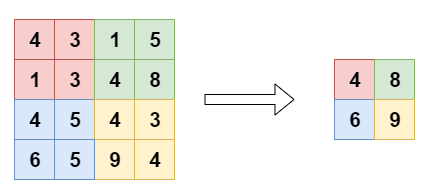
### ii. Average Pooling
It is different from Max Pooling; it retains information about the lesser essential features. It simply downscales by dividing the input matrix into rectangular regions and calculating the average values of each area. 
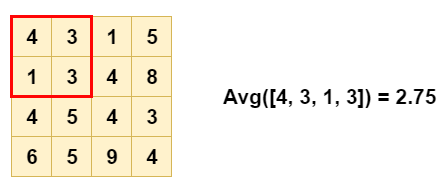
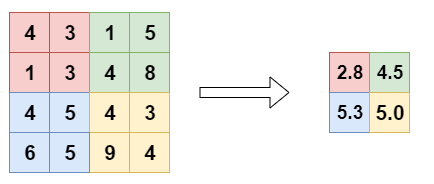
### iii. Sum Pooling
It is similar to Max pooling, but instead of calculating the maximum value, we calculate the mean of each sub-region.

reference : https://www.codingninjas.com/codestudio/library/convolution-layer-padding-stride-and-pooling-in-cnn

### 3.  Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets.

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [152]:
for dirname, _, filenames in os.walk('Yoga pose'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Yoga pose\dataset\adho mukha svanasana\1. 1.png
Yoga pose\dataset\adho mukha svanasana\1. 5-benefits-of-downward-facing-dog-pose.png
Yoga pose\dataset\adho mukha svanasana\10. screen-shot-2017-09-15-at-17.00.06-1024x585.png
Yoga pose\dataset\adho mukha svanasana\11. yoga_anatomy_using_muscle_awareness_to_lower_your_heels_in_downward_facing_dog_pose.png
Yoga pose\dataset\adho mukha svanasana\12. 66a62b8c606fd88e0401b5af0a7cbca7.png
Yoga pose\dataset\adho mukha svanasana\12. downward-facing-dog-pose.png
Yoga pose\dataset\adho mukha svanasana\13. downward-facing-dog-800x490.png
Yoga pose\dataset\adho mukha svanasana\14. downward-dog-pose-as-done-by-a-dog.png
Yoga pose\dataset\adho mukha svanasana\14. untitled_design_33.png
Yoga pose\dataset\adho mukha svanasana\16. one-leg-downward-facing-dog-yoga-pose.png
Yoga pose\dataset\adho mukha svanasana\17. screen_shot_2014-03-20_at_2.05.15_pm.png
Yoga pose\dataset\adho mukha svanasana\18. screenshot_20180504-085613-450x800.png
Yoga pose\dataset\a

In [153]:
# Finding out the Number of Asanas
for dirpath,dirnames,filenames in os.walk("Yoga pose/dataset"):
    print(f"There are {len(dirnames)} asanas in the '{dirpath}'")

There are 107 asanas in the 'Yoga pose/dataset'
There are 0 asanas in the 'Yoga pose/dataset\adho mukha svanasana'
There are 0 asanas in the 'Yoga pose/dataset\adho mukha vriksasana'
There are 0 asanas in the 'Yoga pose/dataset\agnistambhasana'
There are 0 asanas in the 'Yoga pose/dataset\ananda balasana'
There are 0 asanas in the 'Yoga pose/dataset\anantasana'
There are 0 asanas in the 'Yoga pose/dataset\anjaneyasana'
There are 0 asanas in the 'Yoga pose/dataset\ardha bhekasana'
There are 0 asanas in the 'Yoga pose/dataset\ardha chandrasana'
There are 0 asanas in the 'Yoga pose/dataset\ardha matsyendrasana'
There are 0 asanas in the 'Yoga pose/dataset\ardha pincha mayurasana'
There are 0 asanas in the 'Yoga pose/dataset\ardha uttanasana'
There are 0 asanas in the 'Yoga pose/dataset\ashtanga namaskara'
There are 0 asanas in the 'Yoga pose/dataset\astavakrasana'
There are 0 asanas in the 'Yoga pose/dataset\baddha konasana'
There are 0 asanas in the 'Yoga pose/dataset\bakasana'
There are

In [154]:
anantasana=len(os.listdir("Yoga pose/dataset/anantasana"))
anantasana
# 43 Images so we wont be splitting it to Train Test and Rather Make Predictions of Custom Images

42

In [155]:
data_dir=pathlib.Path("Yoga pose/dataset")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names
# Creating an array of Classes for Predictions

array(['adho mukha svanasana', 'adho mukha vriksasana', 'agnistambhasana',
       'ananda balasana', 'anantasana', 'anjaneyasana', 'ardha bhekasana',
       'ardha chandrasana', 'ardha matsyendrasana',
       'ardha pincha mayurasana', 'ardha uttanasana',
       'ashtanga namaskara', 'astavakrasana', 'baddha konasana',
       'bakasana', 'balasana', 'bhairavasana', 'bharadvajasana i',
       'bhekasana', 'bhujangasana', 'bhujapidasana', 'bitilasana',
       'camatkarasana', 'chakravakasana', 'chaturanga dandasana',
       'dandasana', 'dhanurasana', 'durvasasana',
       'dwi pada viparita dandasana', 'eka pada koundinyanasana i',
       'eka pada koundinyanasana ii', 'eka pada rajakapotasana',
       'eka pada rajakapotasana ii', 'ganda bherundasana',
       'garbha pindasana', 'garudasana', 'gomukhasana', 'halasana',
       'hanumanasana', 'janu sirsasana', 'kapotasana', 'krounchasana',
       'kurmasana', 'lolasana', 'makara adho mukha svanasana',
       'makarasana', 'malasana', 'm

In [156]:
train_dir="Yoga pose/dataset"

In [157]:
# Data Pre Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Reescaling the Data
train_datagen=  ImageDataGenerator(rescale=1/255.)

In [158]:
# Loading the Data from the dirs and turnit into Batches
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 5886 images belonging to 107 classes.


In [159]:
# Creating a CNN Model for Training 
# Creating the Model
model=Sequential([Conv2D(10,3,input_shape=(224,224,3)),
                  Activation(activation="relu"),
                  Conv2D(10,3,activation="relu"),
                  MaxPool2D(),
                  Conv2D(10,3,activation="relu"),
                  Conv2D(10,3,activation="relu"),
                  MaxPool2D(),
                  Flatten(),
                  Dense(107,activation='softmax')
                 ])
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [161]:
# Over Fitting the Model to the Dataset
history=model.fit(train_data,epochs=10,steps_per_epoch=len(train_data))

Epoch 1/10
184/184 [==============================] - 290s 2s/step - loss: 0.1074 - accuracy: 0.9769
Epoch 2/10
184/184 [==============================] - 291s 2s/step - loss: 0.1005 - accuracy: 0.9783
Epoch 3/10
184/184 [==============================] - 289s 2s/step - loss: 0.0982 - accuracy: 0.9788
Epoch 4/10
184/184 [==============================] - 290s 2s/step - loss: 0.1065 - accuracy: 0.9779
Epoch 5/10
184/184 [==============================] - 290s 2s/step - loss: 0.1013 - accuracy: 0.9791
Epoch 6/10
184/184 [==============================] - 286s 2s/step - loss: 0.1007 - accuracy: 0.9769
Epoch 7/10
184/184 [==============================] - 289s 2s/step - loss: 0.0826 - accuracy: 0.9786
Epoch 8/10
184/184 [==============================] - 289s 2s/step - loss: 0.0880 - accuracy: 0.9781
Epoch 9/10
184/184 [==============================] - 289s 2s/step - loss: 0.0778 - accuracy: 0.9796
Epoch 10/10
184/184 [==============================] - 287s 2s/step - loss: 0.0787 - accura

In [162]:
# Evaluating the Model
testdata="Test_data"
from PIL import Image
test_data=train_datagen.flow_from_directory(testdata,target_size=(224,224),class_mode="categorical")

Found 105 images belonging to 107 classes.


In [164]:
model.evaluate(test_data)

4/4 [==============================] - 2s 376ms/step - loss: 4.6311 - accuracy: 0.2286


[4.631065845489502, 0.22857142984867096]

### 4.What is overfitting? How to overcome overfitting in an ML model?

Overfitting refers to a model that models the training data too well.
Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:

Use a resampling technique to estimate model accuracy.
Hold back a validation dataset.
The most popular resampling technique is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.

A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.

Using cross validation is a gold standard in applied machine learning for estimating model accuracy on unseen data. If you have the data, using a validation dataset is also an excellent practice.

reference : https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/